<IPython.core.display.Javascript object>


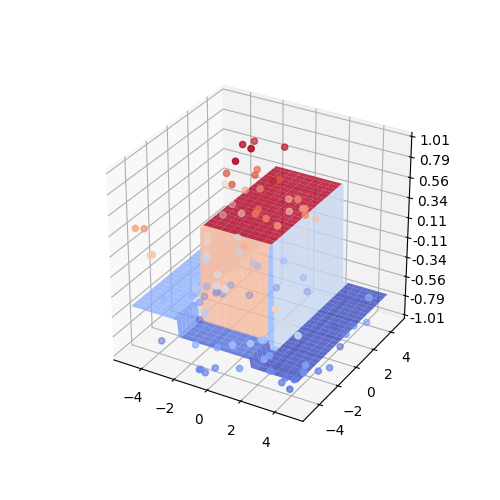

In [4]:
%matplotlib notebook 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

from sklearn.tree import DecisionTreeRegressor


fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

X1_test = np.arange(-5, 5, 0.1)
X2_test = np.arange(-5, 5, 0.1)
X1_test, X2_test = np.meshgrid(X1_test, X2_test)
R = np.sqrt(X1_test**2 + X2_test**2)
y_test = np.sin(R)

# Plot the surface.
# surf = ax.plot_surface(X1_test, X2_test, y_test, cmap=cm.coolwarm,
#                        linewidth=0, alpha=0.5, rstride=5, cstride=5)

indexes = np.arange(X1_test.size)
np.random.shuffle(indexes)
indexes = indexes[:100]
X = np.array([X1_test.flatten(), X2_test.flatten()]).T[indexes,:]
y = y_test.flatten()[indexes]
y[::2] += 0.5 - np.random.rand(y.size / 2)

clf = DecisionTreeRegressor(max_leaf_nodes=4, random_state=1)
clf.fit(X, y)
y_pred = clf.predict(np.array([X1_test.flatten(), X2_test.flatten()]).T)

surf = ax.plot_surface(X1_test, X2_test, np.reshape(y_pred , (100, 100)), 
                       cmap=cm.coolwarm,
                       linewidth=0.5, alpha=0.8, rstride=4, cstride=5)

ax.scatter(X[:,0], X[:,1], y, c=y, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
